In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# 创建模拟数据
np.random.seed(0)
n = 500
X = np.random.rand(n, 3)
y = 5 * X[:, 0] ** 3 + 10 * X[:, 1] ** 2 + 2 * X[:, 2] + 5 + np.random.randn(n) * 0.5
X

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# 创建模拟数据
np.random.seed(0)
n = 500
X = np.random.rand(n, 3)
y = 5 * X[:, 0] ** 3 + 10 * X[:, 1] ** 2 + 2 * X[:, 2] + 5 + np.random.randn(n) * 0.5

# 划分训练集和测试集
train_X = X[:400]
train_y = y[:400]
test_X = X[400:]
test_y = y[400:]

# 定义模型
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(3,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 编译模型
model.compile(optimizer='adam', loss='mse')

# 训练模型
history = model.fit(train_X, train_y, epochs=50, batch_size=32, validation_data=(test_X, test_y))

# 可视化训练和测试误差
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.ylim([0, 5])
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

# 预测并可视化结果
pred_y = model.predict(test_X).flatten()
plt.scatter(test_y, pred_y)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
plt.plot([-100, 100], [-100, 100])
plt.show()




In [45]:
import pandas as pd
import numpy as np

# df = pd.read_excel('版本1_生成自然对数(Ln)变量_版本1_缺失值处理_Monohulled Sailboats_副本1.xlsx')
df = pd.read_excel(r'D:\Users\win\Downloads\美赛Y题（全部更新完毕包括数据） (1)\2023_MCM_Problem_Y_Boats.xlsx')
df = df.sample(frac=1).reset_index(drop=True)
X = df
Y = df.pop('Listing Price (USD)')  # 用实际的列名替换“列名”
df

,Make,Variant,Length \n(ft),Geographic Region,Country/Region/State,Year
0,Jeanneau,Sun Odyssey 409,40,Europe,Croatia,2015
1,Beneteau,Oceanis 50,49,Europe,Romania,2006
2,Beneteau,America 50,49,Caribbean,Mexico,2009
3,Beneteau,Oceanis 38,37,USA,Ohio,2014
4,Bavaria,41 Cruiser,40,Europe,Croatia,2014
...,...,...,...,...,...,...
2341,Bavaria,50 Cruiser,49,Europe,Italy,2007
2342,Beneteau,Oceanis 43,43,Europe,Greece,2008
2343,Hanse,455,44,Europe,Ireland,2017
2344,Hanse,445,44,Europe,Spain,2012


Epoch 1/1000
66/66 [==============================] - 1s 3ms/step - loss: 30.8281 - val_loss: 13.1622
Epoch 2/1000
66/66 [==============================] - 0s 2ms/step - loss: 9.1959 - val_loss: 7.7842
Epoch 3/1000
66/66 [==============================] - 0s 2ms/step - loss: 6.9579 - val_loss: 7.9938
Epoch 4/1000
66/66 [==============================] - 0s 2ms/step - loss: 6.2960 - val_loss: 6.0509
Epoch 5/1000
66/66 [==============================] - 0s 2ms/step - loss: 4.3321 - val_loss: 12.4970
Epoch 6/1000
66/66 [==============================] - 0s 2ms/step - loss: 6.4091 - val_loss: 4.4593
Epoch 7/1000
66/66 [==============================] - 0s 2ms/step - loss: 3.1115 - val_loss: 2.9139
Epoch 8/1000
66/66 [==============================] - 0s 2ms/step - loss: 2.5625 - val_loss: 3.9640
Epoch 9/1000
66/66 [==============================] - 0s 2ms/step - loss: 2.1927 - val_loss: 2.1693
Epoch 10/1000
66/66 [==============================] - 0s 2ms/step - loss: 1.8548 - val_loss: 2.1

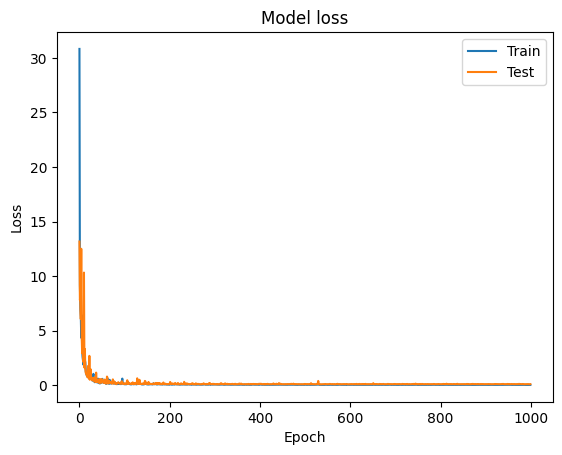

74/74 [==============================] - 0s 751us/step


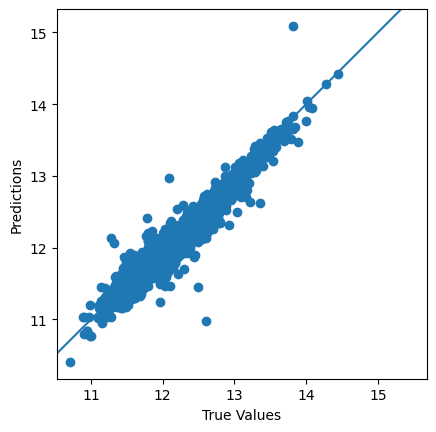

0.9053554700976192


In [77]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA


df = pd.read_excel('版本1_生成自然对数(Ln)变量_版本1_缺失值处理_Monohulled Sailboats_副本1.xlsx')
# df = pd.read_excel(r'原始数据_2023_MCM_Problem_Y_Boats.xlsx')
df = df.sample(frac=1).reset_index(drop=True)
df.dropna(inplace=True)
df.reset_index(inplace=True, drop=True)
X = df
Y = df.pop('Q1-自然对数(Ln)_Listing Price (USD)_缺失值处理')  # 用实际的列名替换“列名”
Y = np.asarray(Y)


# mean=np.mean(X,axis=1)
# std=np.std(X,axis=1)
# X=((X.T-mean)/std).T
# 使用PCA进行降维
pca = PCA(n_components=12)
X = pca.fit_transform(X)


import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# 定义模型
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation='relu', input_shape=(X.shape[1],)),
    # tf.keras.layers.Dense(512, activation='relu'),
    # tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256*2, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 编译模型
model.compile(optimizer='adam', loss='mse')

# 训练模型
history = model.fit(X, Y, epochs=1000, validation_split=0.1)

# 可视化训练和测试误差
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
# plt.ylim([0, 10])
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

# 预测并可视化结果
y_pred = model.predict(X)
plt.scatter(Y, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.axis('square')
# plt.xlim([9e4, 1e5])
# plt.ylim([9e4, 1e5])
_ = plt.plot([-1e10, 1e10], [-1e10, 1e10])
plt.show()

from sklearn.metrics import r2_score

print(r2_score(Y, y_pred))